In [1]:
# Data vizualisation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Metrics
from sklearn import metrics

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Resampling 
from sklearn.utils import resample

In [2]:
data_heart = pd.read_csv('./heart_2020_cleaned.csv')
data_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


We can see that most of the attributes are in the form of categories (mostly binary), so we will do the visualization differently from previous projects. 

In [3]:
data_heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


We display these values which are continuous in the form of a distribution 

In [4]:
continious_features = pd.concat([data_heart['BMI'], data_heart['PhysicalHealth'], data_heart['MentalHealth'], data_heart['SleepTime'], data_heart['HeartDisease']], axis=1)
continious_features.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease
0,16.60,3.0,30.0,5.0,No
1,20.34,0.0,0.0,7.0,No
2,26.58,20.0,30.0,8.0,No
3,24.21,0.0,0.0,6.0,No
4,23.71,28.0,0.0,8.0,No


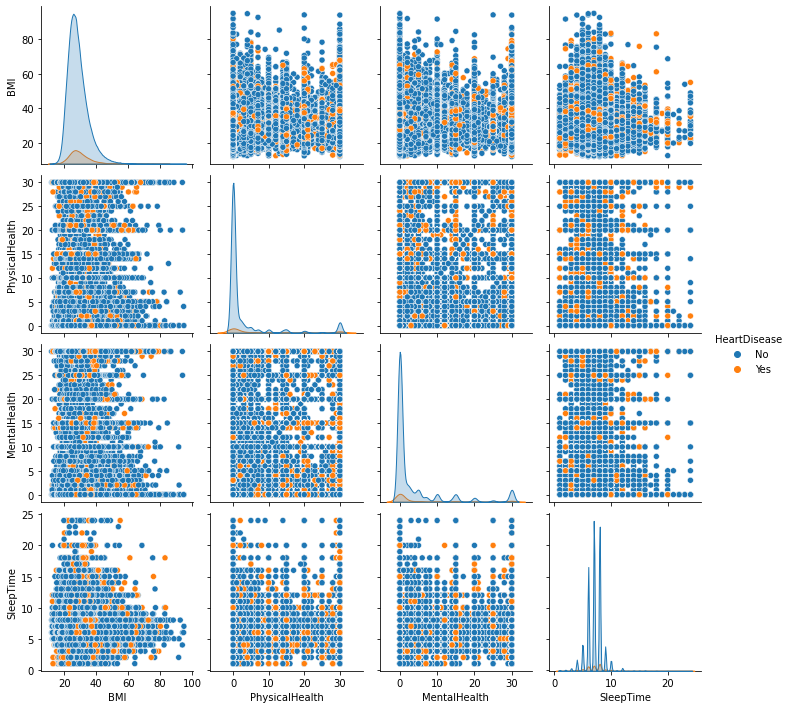

In [5]:
sns.pairplot(continious_features, hue='HeartDisease')

Now we display the rest of the variables to see their distribution.

Text(0.5, 1.0, 'Skin Cancer')

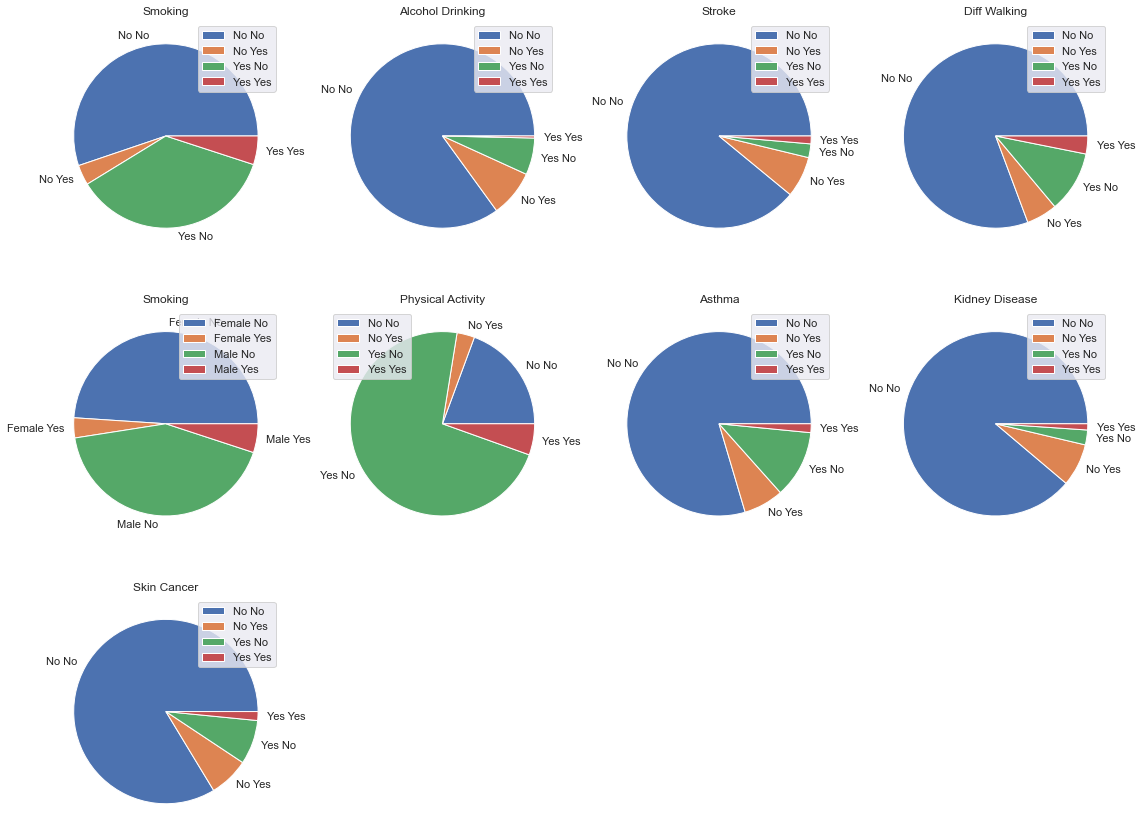

In [33]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(19,15))
plt.subplot(3,4,1)
plt.pie(data_heart.groupby(['Smoking'])['HeartDisease'].value_counts(), labels=['No No', 'No Yes', 'Yes No', 'Yes Yes'])
plt.legend()
plt.title('Smoking')
plt.subplot(3,4,2)
plt.pie(data_heart.groupby(['AlcoholDrinking'])['HeartDisease'].value_counts(), labels=['No No', 'No Yes', 'Yes No', 'Yes Yes'])
plt.legend()
plt.title('Alcohol Drinking')
plt.subplot(3,4,3)
plt.pie(data_heart.groupby(['Stroke'])['HeartDisease'].value_counts(), labels=['No No', 'No Yes', 'Yes No', 'Yes Yes'])
plt.legend()
plt.title('Stroke')
plt.subplot(3,4,4)
plt.pie(data_heart.groupby(['DiffWalking'])['HeartDisease'].value_counts(), labels=['No No', 'No Yes', 'Yes No', 'Yes Yes'])
plt.legend()
plt.title('Diff Walking')

plt.subplot(3,4,5)
plt.pie(data_heart.groupby(['Sex'])['HeartDisease'].value_counts(), labels=['Female No', 'Female Yes', 'Male No', 'Male Yes'])
plt.legend()
plt.title('Smoking')
plt.subplot(3,4,6)
plt.pie(data_heart.groupby(['PhysicalActivity'])['HeartDisease'].value_counts(), labels=['No No', 'No Yes', 'Yes No', 'Yes Yes'])
plt.legend()
plt.title('Physical Activity')
plt.subplot(3,4,7)
plt.pie(data_heart.groupby(['Asthma'])['HeartDisease'].value_counts(), labels=['No No', 'No Yes', 'Yes No', 'Yes Yes'])
plt.legend()
plt.title('Asthma')
plt.subplot(3,4,8)
plt.pie(data_heart.groupby(['KidneyDisease'])['HeartDisease'].value_counts(), labels=['No No', 'No Yes', 'Yes No', 'Yes Yes'])
plt.legend()
plt.title('Kidney Disease')
plt.subplot(3,4,9)
plt.pie(data_heart.groupby(['SkinCancer'])['HeartDisease'].value_counts(), labels=['No No', 'No Yes', 'Yes No', 'Yes Yes'])
plt.legend()
plt.title('Skin Cancer')


Text(1.0, 1.0, 'Diabetic')

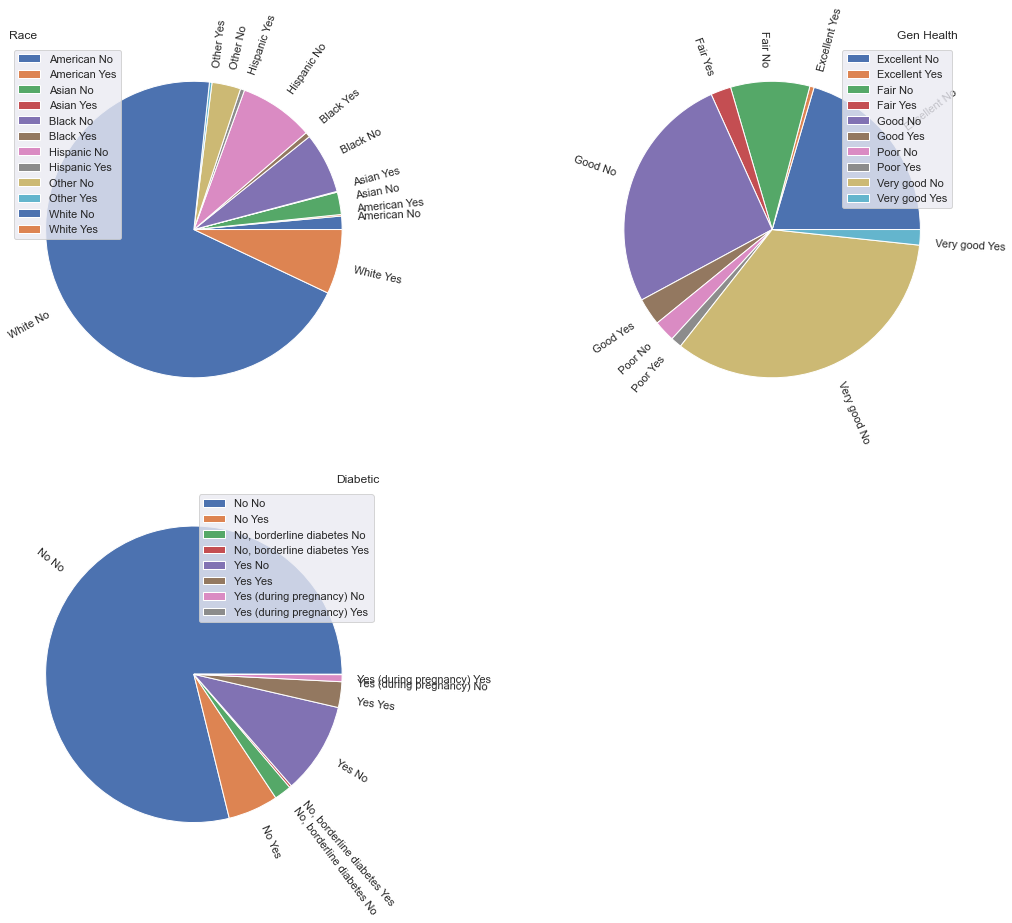

In [63]:
plt.figure(figsize=(19,15))
plt.subplot(2,2,1)
plt.pie(data_heart.groupby(['Race'])['HeartDisease'].value_counts(), labels=['American No', 'American Yes', 'Asian No', 'Asian Yes', 'Black No', 'Black Yes', 'Hispanic No', 'Hispanic Yes', 'Other No', 'Other Yes', 'White No', 'White Yes'], labeldistance=1.1, rotatelabels=True)
plt.legend()
plt.title('Race', loc='left')
plt.subplot(2,2,2)
plt.pie(data_heart.groupby(['GenHealth'])['HeartDisease'].value_counts(), labels=['Excellent No', 'Excellent Yes', 'Fair No', 'Fair Yes', 'Good No', 'Good Yes', 'Poor No', 'Poor Yes', 'Very good No', 'Very good Yes'], labeldistance=1.1, rotatelabels=True)
plt.legend()
plt.title('Gen Health', loc='right')
plt.subplot(2,2,3)
plt.pie(data_heart.groupby(['Diabetic'])['HeartDisease'].value_counts(), labels=['No No', 'No Yes', 'No, borderline diabetes No', 'No, borderline diabetes Yes', 'Yes No', 'Yes Yes', 'Yes (during pregnancy) No', 'Yes (during pregnancy) Yes'], labeldistance=1.1, rotatelabels=True)
plt.legend()
plt.title('Diabetic', loc='right')

Text(0.5, 1.0, 'Age category')

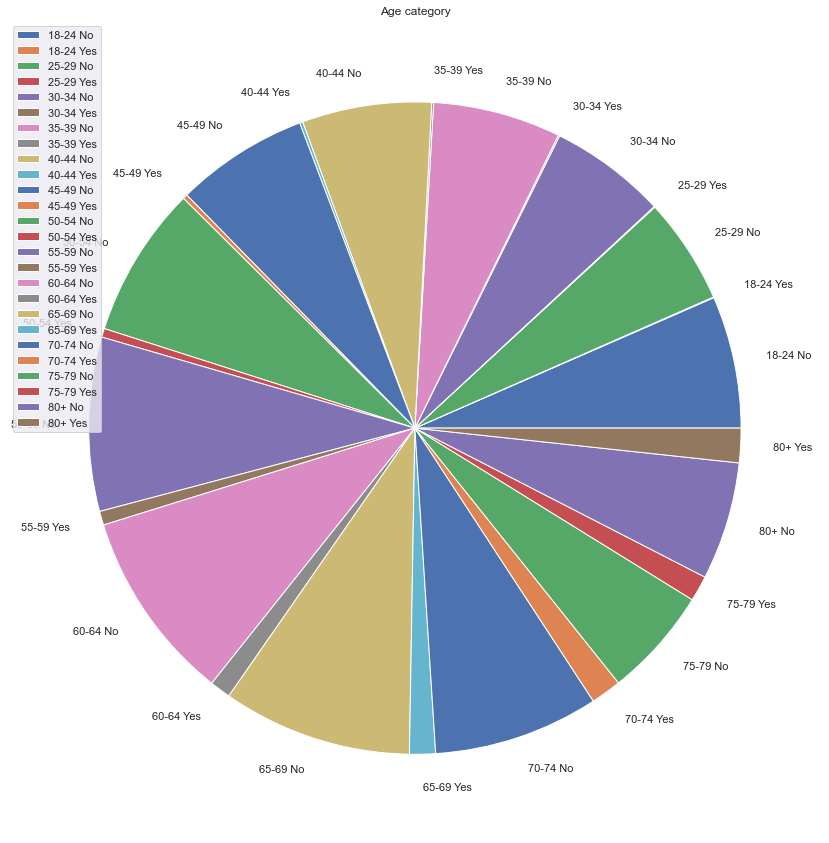

In [36]:
plt.figure(figsize=(15,15))
plt.pie(data_heart.groupby(['AgeCategory'])['HeartDisease'].value_counts(), labels=['18-24 No', '18-24 Yes', '25-29 No', '25-29 Yes', '30-34 No', '30-34 Yes', '35-39 No', '35-39 Yes', '40-44 No', '40-44 Yes', '45-49 No', '45-49 Yes', '50-54 No', '50-54 Yes', '55-59 No', '55-59 Yes', '60-64 No', '60-64 Yes', '65-69 No', '65-69 Yes','70-74 No', '70-74 Yes', '75-79 No', '75-79 Yes', '80+ No', '80+ Yes'])
plt.legend()
plt.title('Age category')

We will encode the categorical data to allow us to proceed to the classification

In [6]:
data_heart['AgeCategory'] = data_heart['AgeCategory'].astype('category').cat.codes
data_heart['Smoking'] = data_heart['Smoking'].astype('category').cat.codes
data_heart['AlcoholDrinking'] = data_heart['AlcoholDrinking'].astype('category').cat.codes
data_heart['Stroke'] = data_heart['Stroke'].astype('category').cat.codes
data_heart['DiffWalking'] = data_heart['DiffWalking'].astype('category').cat.codes
data_heart['Sex'] = data_heart['Sex'].astype('category').cat.codes
data_heart['Race'] = data_heart['Race'].astype('category').cat.codes
data_heart['Diabetic'] = data_heart['Diabetic'].astype('category').cat.codes
data_heart['GenHealth'] = data_heart['GenHealth'].astype('category').cat.codes
data_heart['Asthma'] = data_heart['Asthma'].astype('category').cat.codes
data_heart['KidneyDisease'] = data_heart['KidneyDisease'].astype('category').cat.codes
data_heart['SkinCancer'] = data_heart['SkinCancer'].astype('category').cat.codes
data_heart['PhysicalActivity'] = data_heart['PhysicalActivity'].astype('category').cat.codes

In [7]:
data_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,No,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,No,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,No,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,No,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


## Classification
Since the problem has many categorical variables, we opt for algorithms based on decision trees
### Random Forrest

In [8]:
etiq = data_heart['HeartDisease']
features_heart = data_heart.copy()
features_heart.drop(['HeartDisease'], inplace=True, axis=1)
features_heart.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [9]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(features_heart, etiq, test_size=0.3,random_state=23)

In [11]:
forrest = RandomForestClassifier(n_estimators = 700, max_features = 'sqrt', criterion = 'entropy', class_weight='balanced', random_state = 10).fit(fv_train,etiq_train)
yforrest = forrest.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yforrest))
print("F1-score : ",metrics.f1_score(etiq_test, yforrest, average='macro'))

Accuracy :  0.9056483807419298
F1-score :  0.5531285290369775


This is a perfect example to prove the difference between accuracy and F1-score, since on a problem like the following (a classification with unbalanced classes) the F1-score is more representative and we see this with the confusion matrix below

Text(0.5, 1.0, 'Confusion matrix Random Forrest')

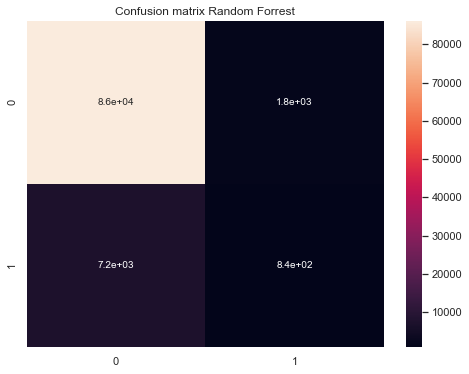

In [13]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest), annot=True, annot_kws={"size": 10})
plt.title("Confusion matrix Random Forrest")

This confirms what was said earlier, the least represented class is greatly neglected in the classification.
### Extremely Randomized Trees

In [14]:
extra = ExtraTreesClassifier(n_estimators=700, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=None, random_state=0, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(fv_train,etiq_train)
yextra = extra.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yextra))
print("F1-score : ",metrics.f1_score(etiq_test, yextra, average='macro'))

Accuracy :  0.8982582682746328
F1-score :  0.5707295490534212


Text(0.5, 1.0, 'Confusion matrix Extremely randomized tree')

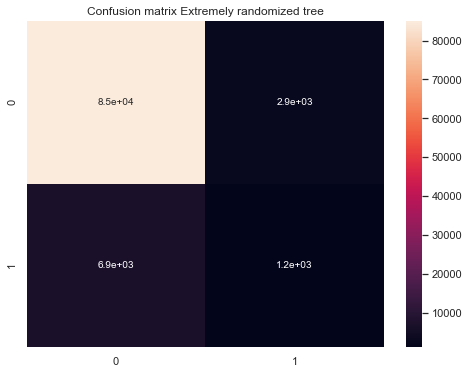

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yextra), annot=True, annot_kws={"size": 10})
plt.title("Confusion matrix Extremely randomized tree")

Nevertheless, we find a better result for the minority class, we now try with another algorithm
### Adaboost

In [16]:
ada = AdaBoostClassifier(base_estimator=None, n_estimators=350, learning_rate=0.15, algorithm='SAMME.R', random_state=0).fit(fv_train,etiq_train)
yada = ada.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yada))
print("F1-score : ",metrics.f1_score(etiq_test, yada, average='macro'))

Accuracy :  0.9168846871449567
F1-score :  0.5664914666809896


Text(0.5, 1.0, 'Confusion matrix Adaboost')

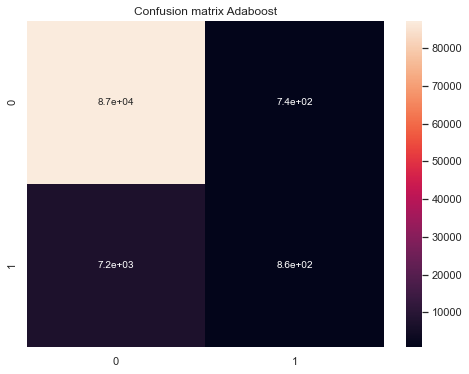

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yada), annot=True, annot_kws={"size": 10})
plt.title("Confusion matrix Adaboost")

### Gradient Boosting

In [18]:
gradient = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=300, criterion='friedman_mse', random_state=0).fit(fv_train,etiq_train)
ygradient = gradient.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ygradient))
print("F1-score : ",metrics.f1_score(etiq_test, ygradient, average='macro'))

Accuracy :  0.9176872804594586
F1-score :  0.5618876579166263


Text(0.5, 1.0, 'Confusion matrix gradient boosting')

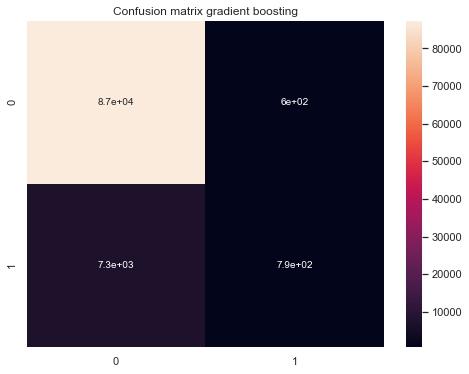

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ygradient), annot=True, annot_kws={"size": 10})
plt.title("Confusion matrix gradient boosting")

### KNN

Accuracy :  0.9112561106536445
F1-score :  0.5271373925919901


Text(0.5, 1.0, 'Confusion matrix')

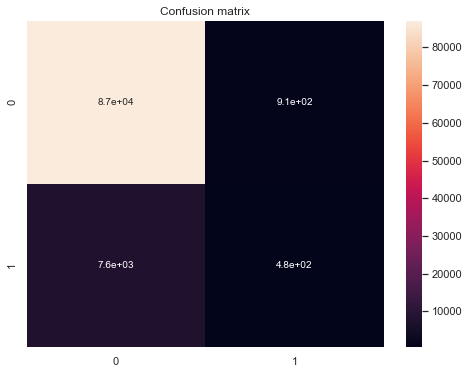

In [21]:
knn=KNeighborsClassifier(n_neighbors=7, p=2)
knn.fit(fv_train,etiq_train)
yknn=knn.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yknn))
print("F1-score : ", metrics.f1_score(etiq_test, yknn, average='macro'))
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix')

## Data augmentation
We will perform a data augmentation to allow us to have better results

In [22]:
data_heart['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

We have then : 
- No : 292422
- Yes : 27373

With a resampling we will pass this : 
- No : 292422
- Yes : 120000

In [23]:
data_heart_resampling = data_heart.copy()
data_no = data_heart_resampling[data_heart_resampling["HeartDisease"]=='No']
data_yes = data_heart_resampling[data_heart_resampling["HeartDisease"]=='Yes']

In [24]:
data_yes = resample(data_yes, replace=True, n_samples=120000,random_state=123)

In [25]:
data_heart_balanced = pd.concat([data_no, data_yes])
data_heart_balanced["HeartDisease"].count()

412422

We have successfully performed the up sampling, now we move to the classification

In [26]:
etiq = data_heart_balanced['HeartDisease']
features_heart_balanced = data_heart_balanced.copy()
features_heart_balanced.drop(['HeartDisease'], inplace=True, axis=1)
features_heart_balanced.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [27]:
fv_train_balanced, fv_test_balanced, etiq_train, etiq_test = train_test_split(features_heart_balanced, etiq, test_size=0.3,random_state=23)

### Classification

In [28]:
forrest_balanced = RandomForestClassifier(n_estimators = 700, max_features = 'sqrt', criterion = 'entropy', class_weight='balanced', random_state = 10).fit(fv_train_balanced,etiq_train)
yforrest_balanced = forrest_balanced.predict(fv_test_balanced)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yforrest_balanced))
print("F1-score : ",metrics.f1_score(etiq_test, yforrest_balanced, average='macro'))

Accuracy :  0.9479822512466963
F1-score :  0.9385671198631542


In [29]:
extra_balanced = ExtraTreesClassifier(n_estimators=700, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=None, random_state=0, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(fv_train_balanced,etiq_train)
yextra_balanced = extra_balanced.predict(fv_test_balanced)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yextra_balanced))
print("F1-score : ",metrics.f1_score(etiq_test, yextra_balanced, average='macro'))

In [ ]:
ada_balanced = AdaBoostClassifier(base_estimator=None, n_estimators=350, learning_rate=0.15, algorithm='SAMME.R', random_state=0).fit(fv_train_balanced,etiq_train)
yada_balanced = ada_balanced.predict(fv_test_balanced)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yada_balanced))
print("F1-score: ",metrics.f1_score(etiq_test, yada_balanced, average='macro'))

Taux de précision lors des tests :  0.7861663177802743
F1-score lors des tests :  0.7759106238561644


In [ ]:
gradient_balanced = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, criterion='friedman_mse', random_state=0).fit(fv_train_balanced,etiq_train)
ygradient_balanced = gradient_balanced.predict(fv_test_balanced)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ygradient_balanced))
print("F1-score : ",metrics.f1_score(etiq_test, ygradient_balanced, average='macro'))

Taux de précision lors des tests :  0.7911935147542574
F1-score lors des tests :  0.7853367369310889


Text(0.5, 1.0, 'Gradient Boosting')

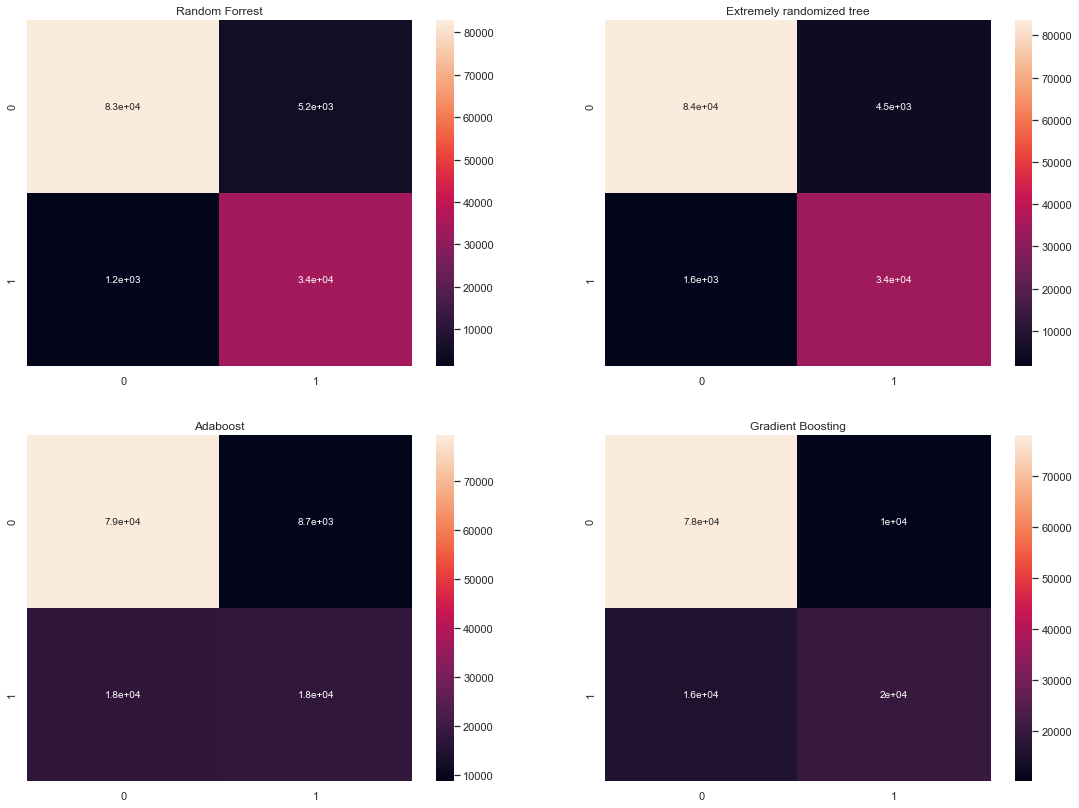

In [ ]:
plt.figure(figsize=(19,14))
plt.title("Matrices de confusion avec augmentation des données")
plt.subplot(2,2,1)
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest_balanced), annot=True, annot_kws={"size": 10})
plt.title("Random Forrest")
plt.subplot(2,2,2)
sns.heatmap(metrics.confusion_matrix(etiq_test, yextra_balanced), annot=True, annot_kws={"size": 10})
plt.title("Extremely randomized tree")
plt.subplot(2,2,3)
sns.heatmap(metrics.confusion_matrix(etiq_test, yada_balanced), annot=True, annot_kws={"size": 10})
plt.title("Adaboost")
plt.subplot(2,2,4)
sns.heatmap(metrics.confusion_matrix(etiq_test, ygradient_balanced), annot=True, annot_kws={"size": 10})
plt.title("Gradient Boosting")